## Topics:

    Theory
    - What is Probability?
    - Terminology in probability
    - Types of probability
    - Events in probability
    - Axioms/Theorems in probability
    - Probability of Tossing Coins
    - Probability of Rolling Dice
    - Probability of Drawing Cards
    Concept
    - Calculate Probability and distribution
    - Conditional Probability and baye's Rule
    - Discrete Random variables
    - Continuous Random variables
    - Averages, law of Large numbers and Central limit theorem
    - Join Distributions and COnditional Expectation
    - Markov Chains

In [11]:
import warnings
warnings.filterwarnings("ignore")

from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

Ref: 

 - Basics: https://www.cuemath.com/data/probability/
 - probability Distribution - https://www.cuemath.com/data/probability-distribution/
 - Conditional probability - https://www.cuemath.com/data/conditional-probability/
 - Poisson Distribution - https://www.cuemath.com/data/poisson-distribution/
 - Geometric distribution - https://www.cuemath.com/geometric-distribution-formula/

#### Random variable

A random variable is a variable that can take on many values.

    - Binomial Distribution
    - geometric distribution
    - Bernoulli Random distribution
    - Poisson Random distribution

### Binomial Distribution

Let $X_1, X_2, \ldots , X_n$ be i.i.d. Bernoulli $(p)$ random variables and let $S_n = X_1 + X_2 \ldots + X_n$. That's a formal way of saying:
- Suppose you have a fixed number $n$ of success/failure trials; and
- the trials are independent; and
- on each trial, the probability of success is $p$.
- Let $S_n$ be the total number of successes.

The first goal of this section is to find the distribution of $S_n$. 

Suppose we were counting the number of sixes in 7 rolls of a die. The 7 rolls are independent of each other, the chance of "success" (getting a six) is $1/6$ on each trial, and $S_7$ is the number of sixes.

The first step in finding the distribution of any random variable is to identify the possible values of the variable. In $n$ trials, the smallest number of successes you can have is 0 and the largest is $n$. So the set of possible values of $S_n$ is $\{0, 1, 2, \ldots , n\}$.

Thus the number of sixes in 7 rolls can be any integer in the 0 through 7 range. Let's find $P(S_7 = 3)$.

Partition the event $\{S_7 = 3\}$ into the different ways it can happen. One way can be denoted SSSFFFF, where S denotes "success" (or "six"), and F denotes failure. Another is SFFSSFF. And so on.

Now notice that 

$$
P(\text{SSSFFFF}) = 
\big{(}\frac{1}{6}\big{)}^3 \big{(}\frac{5}{6}\big{)}^4
= P(\text{SFFSSFF})
$$

by independence. Indeed, any sequence of three S's and four F's has the same probability. So by the addition rule,

$$
\begin{align*}
P(S_7 = 3) &= \text{(number of sequences that have three S and four F)} \cdot \big{(}\frac{1}{6}\big{)}^3 \big{(}\frac{5}{6}\big{)}^4 \\ \\
&= \binom{7}{3} \big{(}\frac{1}{6}\big{)}^3 \big{(}\frac{5}{6}\big{)}^4
\end{align*}
$$

because $\binom{7}{3}$ counts the number of ways you can choose 3 places out of 7 in which to put the symbol S, with the remaining 4 places being filled with F.

An analogous argument leads us to one of the most important distributions in probability theory.

### The Binomial $(n, p)$ Distribution ###
Let $S_n$ be the number of successes in $n$ independent Bernoulli $(p)$ trials. Then $S_n$ has the *binomial distribution with parameters $n$ and $p$*, defined by

$$
P(S_n = k) = \binom{n}{k} p^k (1-p)^{n-k}, ~~~ k = 0, 1, \ldots, n
$$

Parameters of a distribution are constants associated with it. The Bernoulli $(p)$ distribution has parameter $p$. The binomial distribution defined above has parameters $n$ and $p$ and is referred to as the binomial $(n, p)$ distribution for short. You should check that the Bernoulli $(p)$ distribution is the same as the binomial $(1, p)$ distribution.

### Applying the Formula ###

To use the binomial formula, you first have to recognize that it can be used, and then use it as you would use any distribution.

- Check the conditions: a known number of independent, repeated, success/failure trials, and you are counting the number of successes
- Identify the two parameters $n$ and $p$
- Identify each $k$ for which the event occurs
- Add up the binomial $(n, p)$ probabilities for all $k$ in the set you identified (or, if the set is very large, add up the probabilities in the complement and then subtract from 1)

In [49]:
from scipy import stats

The function `stats.binom.pmf` takes three arguments: $k$, $n$, and $p$, in that order. It returns the numerical value of $P(S_n = k)$ For short, we will say that the function returns the binomial $(n, p)$ probability of $k$.

The acronym "pmf" stands for *probability mass function* which as we have noted earlier is sometimes used as another name for the distribution of a variable that has finitely many values.

The chance of 3 sixes in 7 rolls of a die is
$\binom{7}{3}(1/6)^3(5/6)^4$ by the binomial formula, which works out to about 8% by the calculation below.

In [52]:
stats.binom.pmf(3, 7, 1/6)

0.078142861225423008

You can also specify an array or list of values of $k$, and `stats.binom.pmf` will return an array consisting of all their probabilities.

In [54]:
stats.binom.pmf([2, 3, 4], 7, 1/6)

array([ 0.23442858,  0.07814286,  0.01562857])

Thus to find $P(2 \le S_7 \le 4)$, you can use

In [58]:
sum(stats.binom.pmf([2, 3, 4], 7, 1/6))

0.32820001714677638

### Cumulative Distribution Function (cdf) ###

To visualize binomial distributions we will use the `prob140` method `Plot`, by first using `stats.binom.pmf` to calculate the binomial probabilities. The cell below plots the distribution of $S_7$ above. Notice how we start by specifying all the possible values of $S_7$ in the array `k`.

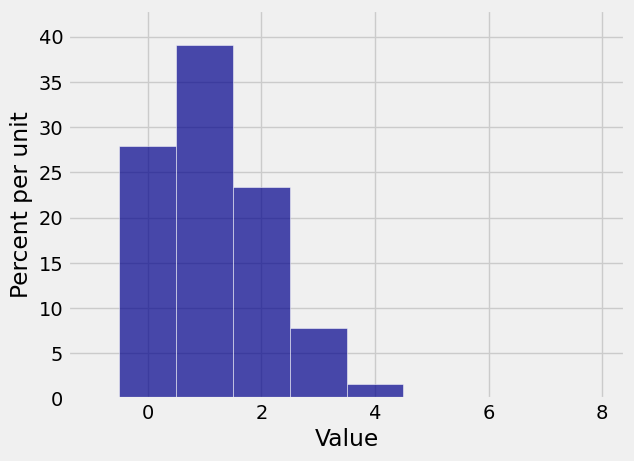

In [62]:
n = 7
p = 1/6
k = np.arange(n+1)
binom_7_1_6 = stats.binom.pmf(k, n, p)
binom_7_1_6_dist = Table().values(k).probabilities(binom_7_1_6)
Plot(binom_7_1_6_dist)

In [67]:
binom_7_1_6_dist

Value,Probability
0,0.279082
1,0.390714
2,0.234429
3,0.0781429
4,0.0156286
5,0.00187543
6,0.000125029
7,3.57225e-06


The *cumulative distribution function* or c.d.f. of any random variable is a function that calculates this "area to the left" of any point. If you denote the c.d.f. by $F$, then

$$
F(x) = P(X \le x)
$$

for any x. 

We will get to know this function better later in the course. For now, note that `stats` lets you calculate it directly without having to use `pmf` and then summing. The function is called `stats.distribution_name.cdf` where `distribution_name` could be `binom` or `hypergeom` or any other distribution name that `stats` recognizes. The first argument is $x$, followed by the parameters of the distribution in a specified order. 

For $X$ a binomial $(7, 1/6)$ random variable, the gold area above is $F(2)$ which is about 90.4%.

To find $P(X > 2)$, we can use the cdf again:

$$
P(X > 2) ~ = ~ 1 - P(X \le 2) ~ = ~ 1 - F(2)
$$

In [71]:
1 - stats.binom.cdf(2, 7, 1/6)

0.095775462962963021

In [73]:
stats.binom.cdf(2, 7, 1/6)

0.90422453703703698

Here is the event $P(5 < Y \le 10)$ for a random variable $Y$ that has the binomial $(20, 0.4)$ distribution.

In [126]:
probs

array([  3.65615844e-05,   4.87487792e-04,   3.08742268e-03,
         1.23496907e-02,   3.49907904e-02,   7.46470195e-02,
         1.24411699e-01,   1.65882266e-01,   1.79705788e-01,
         1.59738478e-01,   1.17141551e-01,   7.09948791e-02,
         3.54974396e-02,   1.45630521e-02,   4.85435071e-03,
         1.29449352e-03,   2.69686150e-04,   4.23037099e-05,
         4.70041221e-06,   3.29853488e-07,   1.09951163e-08])

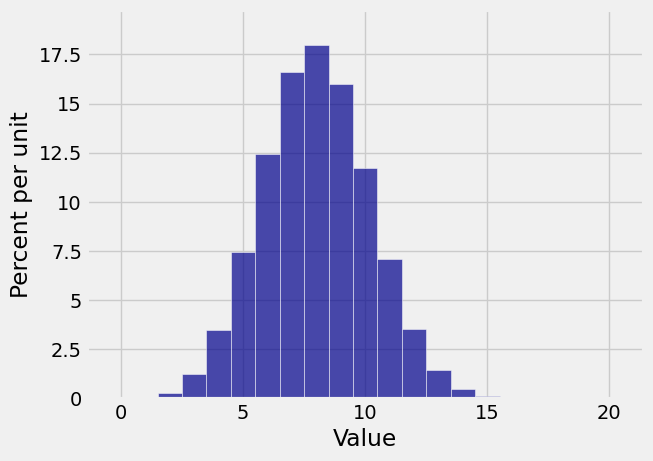

In [78]:
k = np.arange(21)
probs = stats.binom.pmf(k, 20, 0.4)
binom_20_point4 = Table().values(k).probabilities(probs)
Plot(binom_20_point4)

To find $P(5 < Y \le 10)$ we can sum the areas of the gold bars. But we can also use the cdf:

$$
P(5 < Y \le 10) ~ = ~ P(Y \le 10) - P(Y \le 5)
$$

That's about 74.7%.

In [82]:
stats.binom.cdf(10, 20, 0.4) - stats.binom.cdf(5, 20, 0.4)

0.74687978112974585

##### Binomial histograms

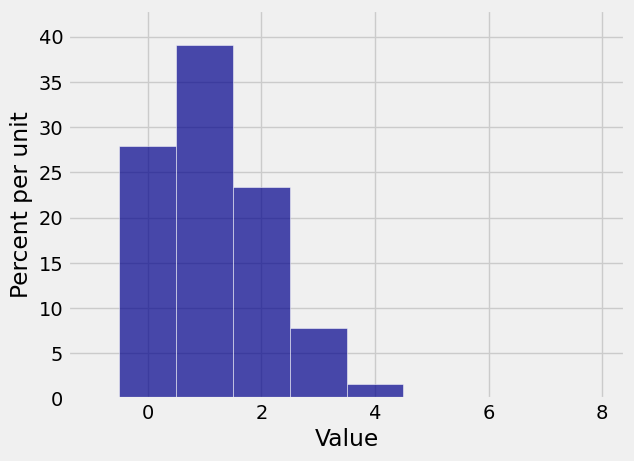

In [86]:
Plot(binom_7_1_6_dist)

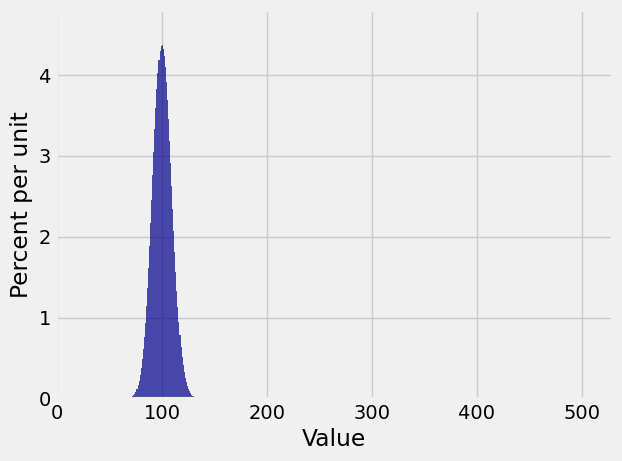

In [88]:
n = 600
p = 1/6
k = np.arange(n+1)
binom_600_1_6 = stats.binom.pmf(k, n, p)
binom_600_1_6_dist = Table().values(k).probabilities(binom_600_1_6)
Plot(binom_600_1_6_dist)

Text(0.5, 1.0, 'Binomial Distrbution')

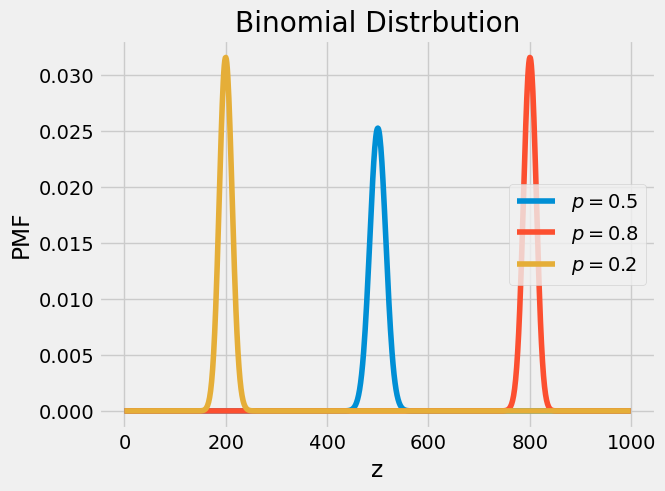

In [223]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('z')
ax.set_ylabel('PMF')

x = np.arange(0, 1000)
y = stats.binom(1000, 0.5).pmf(x)
ax.plot(x, y, label=r'$p=0.5$')

x = np.arange(0, 1000)
y = stats.binom(1000, 0.8).pmf(x)
ax.plot(x, y, label=r'$p=0.8$')

x = np.arange(0, 1000)
y = stats.binom(1000, 0.2).pmf(x)
ax.plot(x, y, label=r'$p=0.2$')
plt.legend()
plt.title('Binomial Distrbution')

This distribution is close to symmetric, even though the die has only a 1/6 chance of showing a six.

Also notice that while the the *possible* values of the number of sixes range from 0 to 600, the *probable* values are in a much smaller range. The `plt.xlim` function allows us to zoom in on the probable values. The semicolon is just to prevent Python giving us a message that clutters up the graph. The `edges=True` option forces `Plot` to draw lines separating the bars; by default, it stops doing that if the number of bars is large.

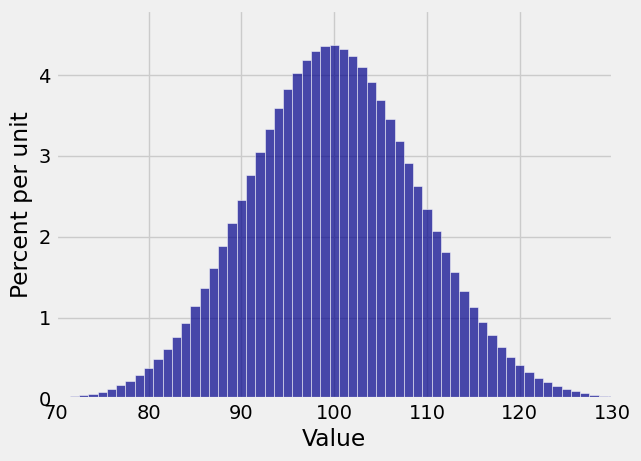

In [91]:
Plot(binom_600_1_6_dist, edges=True)
plt.xlim(70, 130);

But the binomial $(n, p)$ distribution doesn't always look bell shaped if $n$ is large.

Something quite different happens if for example your random variable is the number of successes in 600 independent trials that have probability 1/600 of success on each trial. Then the distribution of the number of successes is binomial $(600, 1/600)$, which looks like this:

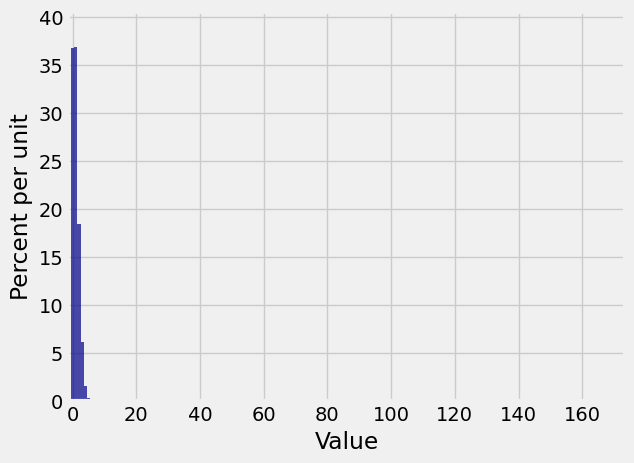

In [94]:
n = 600
p = 1/600
k = np.arange(n+1)
binom_600_1_600 = stats.binom.pmf(k, n, p)
binom_600_1_600_dist = Table().values(k).probabilities(binom_600_1_600)
Plot(binom_600_1_600_dist)

We really can't see that at all! Let's zoom in. When we set the limits on the horizontal axis, we have to account for the bar at 0 being centered at the 0 and hence starting at -0.5.

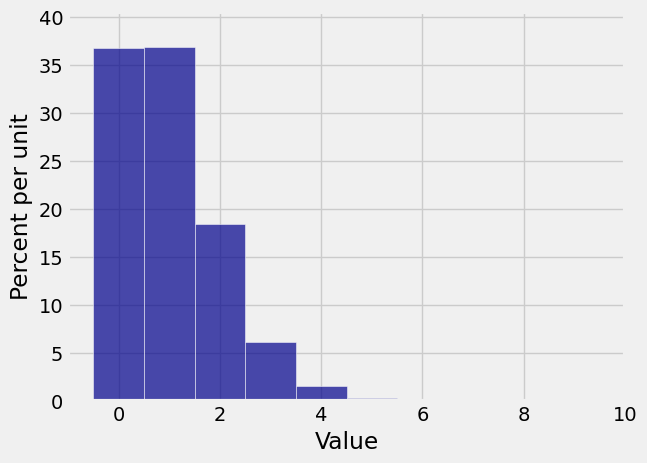

In [98]:
Plot(binom_600_1_600_dist, edges=True)
plt.xlim(-1, 10);

Now you can see that in 600 independent trials with probability 1/600 of success on each trial, you are most likely to get no successes or 1 success. There is some chance that you get 2 through 4 successes, but the chance of any number of successes greater than 4 is barely visible on the scale of the graph.

Clearly, the shape of the histogram is determined by both $n$ and $p$. 

### Poisson Distribution

We know that when $n$ is large and $p$ is small, the chance of $k$ successes in $n$ i.i.d. Bernoulli $(p)$ trials is roughly

$$
P(k) ~ \approx ~ e^{-\mu} \frac{\mu^k}{k!}, ~~ k = 0, 1, 2, \ldots, n
$$
where $\mu = np$.

The terms in the approximation are proportional to terms in the series expansion of $e^\mu$, but *that expansion is infinite*. It doesn't stop at $n$, so we won't either. 

A little care is required before we go further. First, we must state the additivity axiom of probability theory in terms of countably many outcomes:

If events $A_1, A_2, \ldots$ are mutually exclusive, then

$$
P(\bigcup_{i=1}^\infty A_i) ~ = ~ \sum_{i=1}^\infty P(A_i)
$$

This is called the *countable additivity* axiom, in contrast to the finite additivity axiom we have thus far assumed. It doesn't follow from finite additivity, but of course finite additivity follows from it. 

In this course, we will not go into the technical aspects of countable additivity and the existence of probability functions that satisfy the axioms on the spaces that interest us. But those technical aspects do have to be studied before you can develop a deeper understanding of probability theory. If you want to do that, a good start is to take Real Analysis and then Measure Theory.

While in this course, you don't have to worry about it. Just assume that all our work is consistent with the axioms. 

Here is our first infinite valued distribution.

### Poisson Probabilities ###
A random variable $X$ has the *Poisson distribution with parameter $\mu > 0$* if

$$
P(X = k) ~ = ~ e^{-\mu} \frac{\mu^k}{k!}, ~~~~ k = 0, 1, 2, \ldots
$$

The terms are proportional to the terms in the infinte series expansion of $e^{\mu}$. These terms $\frac{\mu^k}{k!}$ for $k \ge 0$ determine the shape of the distribution.

The constant of proportionality is $e^{-\mu}$. It doesn't affect the shape of the histogram. It just ensures that the probabilities add up to 1.

$$
\sum_{k=0}^\infty P(X = k) 
~ = ~ \sum_{k=0}^\infty e^{-\mu} \frac{\mu^k}{k!} 
~ = ~ e^{-\mu} \sum_{k=0}^\infty \frac{\mu^k}{k!} 
~ = ~ e^{-\mu} \cdot e^{\mu} ~ = ~ 1
$$ 

Keep in mind that the Poisson is a distribution in its own right. It does not have to arise as a limit, though it is sometimes helpful to think of it that way. Poisson distributions are often used to model counts of rare events, not necessarily arising out of a binomial setting.

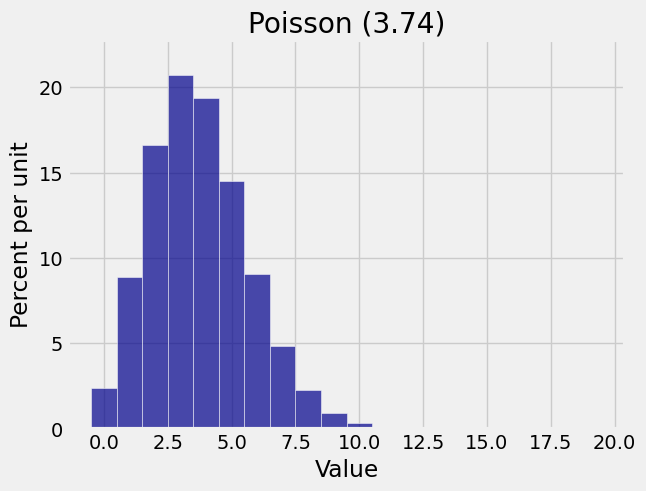

In [114]:
mu = 3.74
k = range(20)
poi_probs_374 = stats.poisson.pmf(k, mu)
poi_dist_374 = Table().values(k).probabilities(poi_probs_374)
Plot(poi_dist_374)
plt.title('Poisson (3.74)');

In [121]:
poi_dist_374

Value,Probability
0,0.0237541
1,0.0888403
2,0.166131
3,0.207111
4,0.193648
5,0.144849
6,0.0902892
7,0.0482402
8,0.0225523
9,0.00937174


The mode is 3. To find a formula for the mode, follow the process we used for the binomial: calculate the consecutive odds ratios, notice that they are decreasing, and see where they cross 1. This is left to you as an exercise. Your calculations should conclude the following:

The **mode** of the Poisson distribution is the integer part of $\mu$. That is, the most likely value is $\mu$ rounded *down* to an integer. If $\mu$ is an integer, both $\mu$ and $\mu - 1$ are modes.

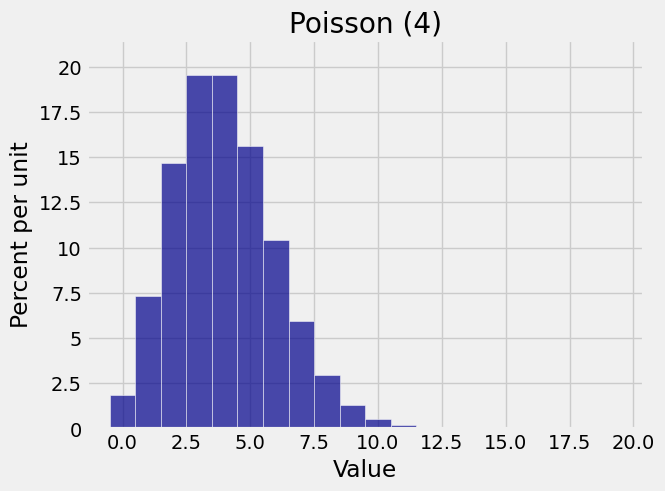

In [117]:
mu = 4
k = range(20)
poi_probs_4 = stats.poisson.pmf(k, mu)
poi_dist_4 = Table().values(k).probabilities(poi_probs_4)
Plot(poi_dist_4)
plt.title('Poisson (4)');


In [119]:
poi_dist_4

Value,Probability
0,0.0183156
1,0.0732626
2,0.146525
3,0.195367
4,0.195367
5,0.156293
6,0.104196
7,0.0595404
8,0.0297702
9,0.0132312


Text(0.5, 1.0, 'Poisson Distribution')

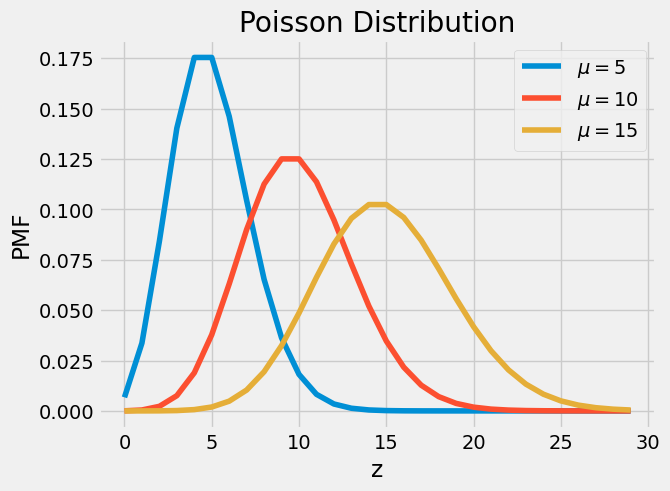

In [225]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('z')
ax.set_ylabel('PMF')

x = np.arange(0, 30)
y = stats.poisson(5).pmf(x)
ax.plot(x, y, label=r'$\mu=5$')

x = np.arange(0, 30)
y = stats.poisson(10).pmf(x)
ax.plot(x, y, label=r'$\mu=10$')

x = np.arange(0, 30)
y = stats.poisson(15).pmf(x)
ax.plot(x, y, label=r'$\mu=15$')
plt.legend()
plt.title('Poisson Distribution')

#### Geometric Distribution

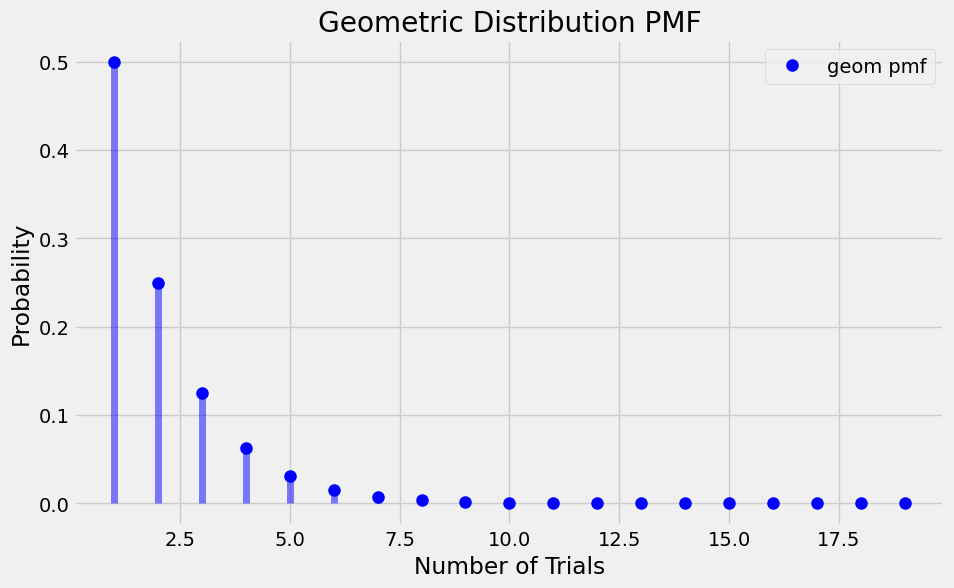

In [254]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

# Parameters
p = 0.5  # Probability of success

# Generate data
x = np.arange(1, 20)
y = geom.pmf(x, p)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', ms=8, label='geom pmf')
plt.vlines(x, 0, y, colors='b', lw=5, alpha=0.5)
plt.title('Geometric Distribution PMF')
plt.xlabel('Number of Trials')
plt.ylabel('Probability')
plt.legend()
plt.show()


#### Bernoulli Distribution

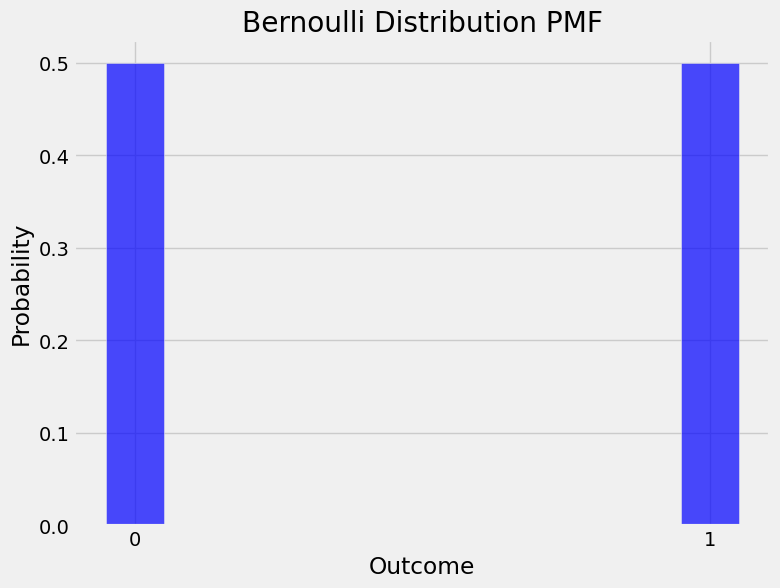

In [256]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# Parameters
p = 0.5  # Probability of success

# Generate data
x = [0, 1]
y = bernoulli.pmf(x, p)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(x, y, width=0.1, color='blue', alpha=0.7)
plt.xticks(x, ['0', '1'])
plt.title('Bernoulli Distribution PMF')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.show()


Additional Ref: 

    https://www.geeksforgeeks.org/discrete-probability-distribution/
    https://thisvsthat.io/bernoulli-distribution-vs-binomial-distribution

#### Central Limit Thoerem

In [230]:
def roll_dice(n_dice, n_times, sides=6):
    return np.random.randint(1, sides+1, size=(n_times, n_dice))

In [240]:
from collections import Counter

def pmf(values, normed=False):
    counts = Counter(values.flatten())
    output = np.array(sorted(counts.items(), key=lambda x: x[0]), dtype='float')
    
    if normed:
        norm = output.T[1].sum()
        output.T[1] = output.T[1]/norm
    
    return output

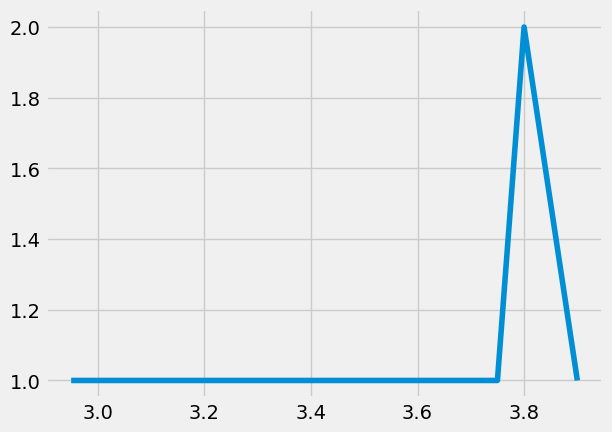

In [246]:
values = roll_dice(20, 10)
total = values.mean(axis=1)
dist = pmf(total)
plt.plot(dist.T[0], dist.T[1])

In [242]:
values = roll_dice(20, 100_000)

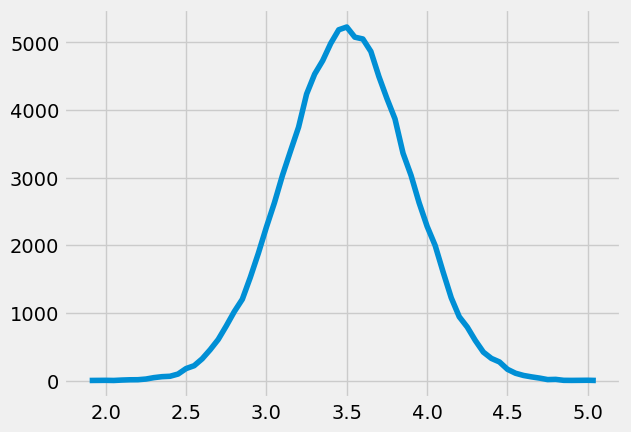

In [244]:
total = values.mean(axis=1)
dist = pmf(total)
plt.plot(dist.T[0], dist.T[1])

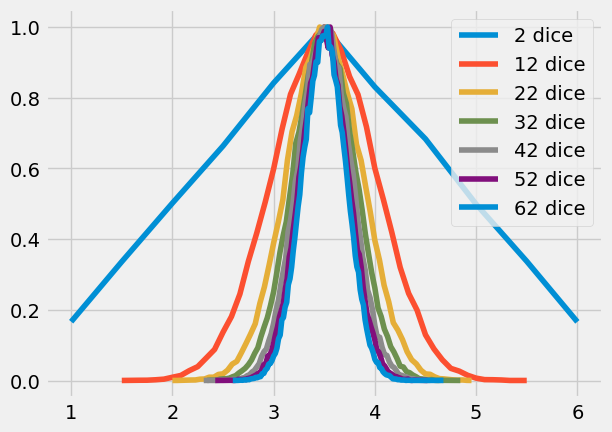

In [248]:
for i in range(2, 63, 10):
    values = roll_dice(i, 100_000)
    dist = pmf(values.mean(axis=1), normed=True)
    plt.plot(dist.T[0], dist.T[1]/dist.T[1].max(), label="%u dice" % i)

plt.legend()

#### Continuous Random Variable & Distribution

Let $f$ be a non-negative function on the real number line and suppose 

$$
\int_{-\infty}^\infty f(x)dx ~ = 1
$$

Then $f$ is called a *probability density function* or just *density* for short.

In the next section we will discuss the reason behind the name. For now, imagine the graph of $f$ as a kind of continuous probability histogram. We will soon make that precise, but notice that by definition the total area under a density curve has to be 1.

As an example, the function $f$ defined by

$$
f(x) = 
\begin{cases}
0 ~~~~~~~~~~~~~~~~~~ \text{if } x \le 0 \\
6x(1-x) ~~~~~ \text{if } 0 < x < 1 \\
0 ~~~~~~~~~~~~~~~~~~ \text{if } x \ge 1 \\
\end{cases}
$$

is a density. It is easy to check by calculus that it integrates to 1. 

**Note:** The calculus used in this text is very straightforward. You should be able to do it easily by hand. Later in this chapter we will give you some Python tools for calculus. We will also show how understanding probability can help us do calculus quickly.

Here is a graph of the function $f$. The density puts all the probability on the unit interval.

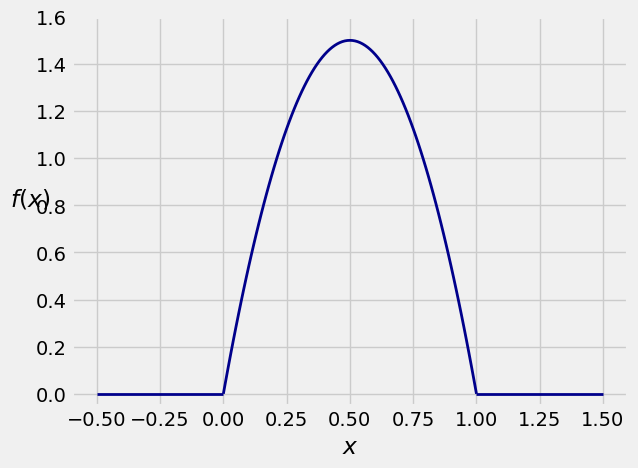

In [153]:
# NO CODE

def f(x):
    return 6*x*(1-x)

x = np.arange(0, 1.01, 0.01)
plt.plot(x, f(x), color='darkblue', lw=2)
plt.plot([-0.5, 0], [0, 0], color='darkblue', lw=2)
plt.plot([1, 1.5], [0, 0], color='darkblue', lw=2)
plt.ylim(-0.05, 1.6)
plt.xlabel('$x$')
plt.ylabel('$f(x)$', rotation=0);

### Areas are Probabilities ###
A random variable $X$ is said to *have density $f$* if for every pair $a < b$,

$$
P(a < X \le b) ~ = ~ \int_a^b f(x)dx
$$

This integral is the area between $a$ and $b$ under the density curve. The graph below shows the area corresponding to $P(0.6 < X \le 0.8)$ for a random variable $X$ that has the density in our example.

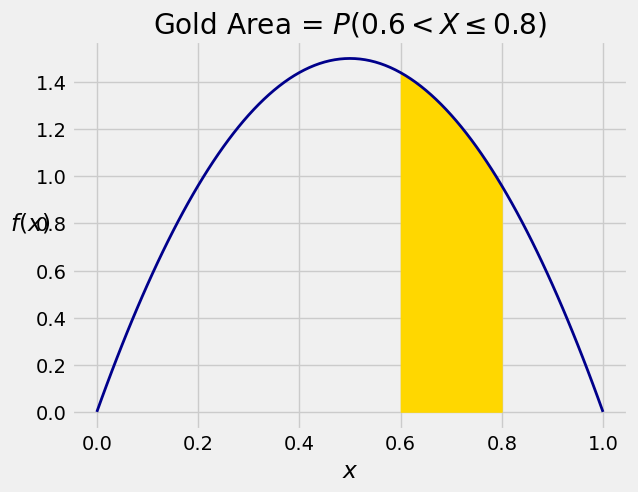

In [156]:
# NO CODE
plt.plot(x, f(x), color='darkblue', lw=2)
w = np.arange(0.6, 0.801, 0.01)
plt.fill_between(w, f(w), color='gold')
plt.xlabel('$x$')
plt.ylabel('$f(x)$', rotation=0)
plt.title('Gold Area = $P(0.6 < X \leq 0.8)$');

The area is

$$
P(0.6 < X \le 0.8) ~ = ~ \int_{0.6}^{0.8} 6x(1-x)dx ~ = ~ 0.248
$$

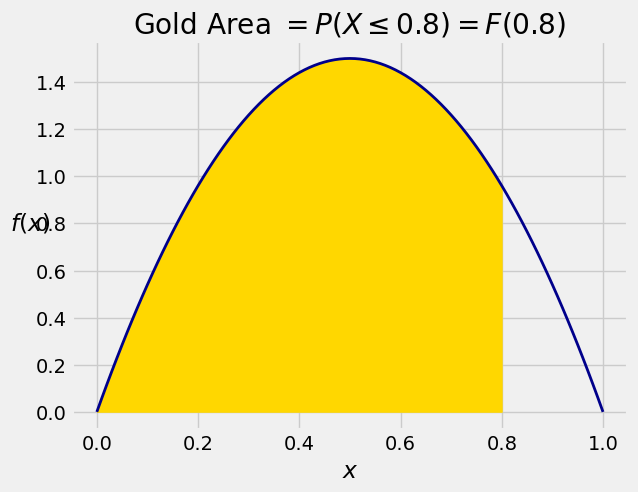

In [159]:
# NO CODE

plt.plot(x, f(x), color='darkblue', lw=2)
w = np.arange(0, 0.801, 0.01)
plt.fill_between(w, f(w), color='gold')
plt.xlabel('$x$')
plt.ylabel('$f(x)$', rotation=0)
plt.title('Gold Area $= P(X \leq 0.8) = F(0.8)$');

$$
P(X \le 0.8) ~ = ~  F(0.8) ~ = ~ 3\cdot0.8^2 - 2\cdot0.8^3 ~ = ~ 0.896
$$

As before, the cdf can be used to find probabilities of intervals. For every pair $a < b$,

$$
P(a < X \le b) ~ = ~ F(b) - F(a) 
$$

Continuous distributions:

    - Exponential Distribution
    - Normal distribution
    - Uniform Distribution
    - T-Distribution
    - Chi-squared Distribution
    - F - distribution
    - beta distribution
    - gamma distribution

## Exponential Distribution ##

A random variable $T$ has the *exponential distribution with parameter $\lambda$* if the density of $T$ is given by

$$
f_T(t) ~ = \lambda e^{-\lambda t}, ~~~ t \ge 0
$$

The graph below shows the density $f_T$ for $\lambda = 5$.

Ref: https://www.knime.com/blog/continuous-probability-distribution

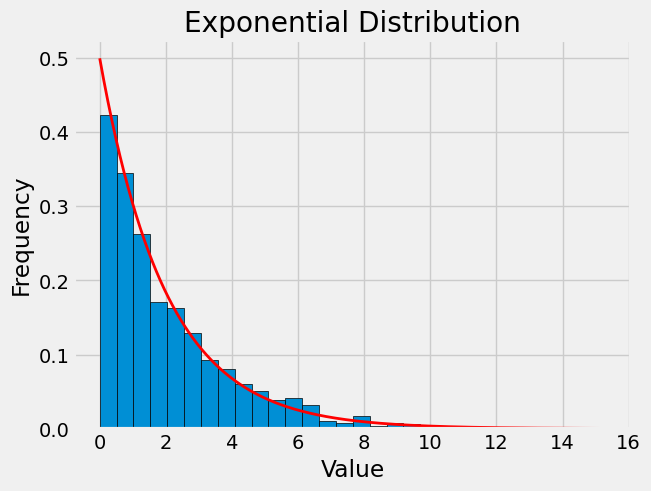

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Set the rate parameter (lambda)
rate = 0.5

# Generate random values from the exponential distribution
size = 1000
data = expon.rvs(scale=1/rate, size=size)

# Plot the histogram of the generated data
plt.hist(data, bins=30, density=True, edgecolor='black')

# Plot the probability density function (PDF)
x = np.linspace(0, np.max(data), 1000)
pdf = expon.pdf(x, scale=1/rate)
plt.plot(x, pdf, 'r-', lw=2)

plt.title('Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


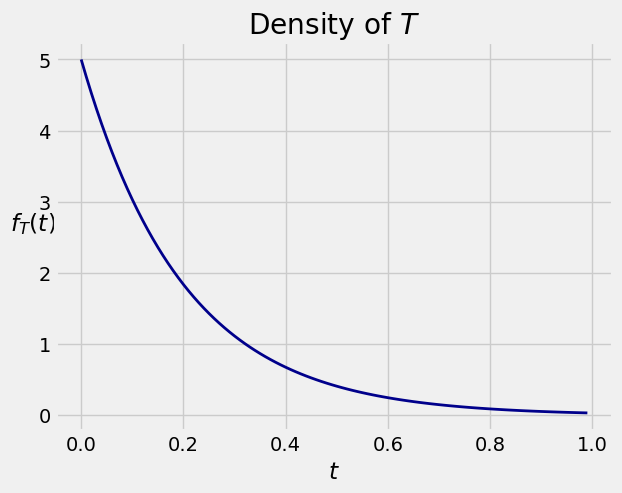

In [191]:
# NO CODE
lam = 5
t = np.arange(0, 1, 0.01)
y = stats.expon.pdf(t, scale=1/5)
#y1 = stats.expon.pdf(t, scale=0.001)

plt.plot(t, y, color='darkblue', lw=2)
#plt.plot(t, y1, color='red', lw=2)
plt.xlabel('$t$')
plt.ylabel('$f_T(t)$', rotation=False)
plt.title('Density of $T$');

### NormalDistribution

Text(0.5, 1.0, 'Gaussian Distribution')

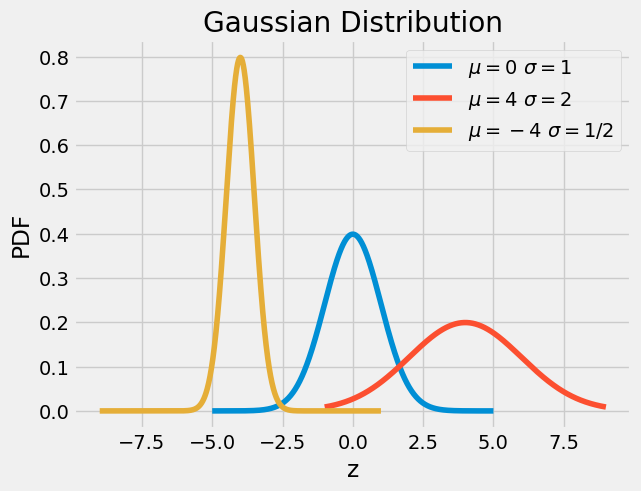

In [221]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('z')
ax.set_ylabel('PDF')

x = np.linspace(-5, 5, 1000)
y = stats.norm().pdf(x)
ax.plot(x, y, label=r'$\mu=0~ \sigma=1$')

x = np.linspace(-1, 9, 1000)
y = stats.norm(loc=4, scale=2).pdf(x)
ax.plot(x, y, label=r'$\mu=4~ \sigma=2$')

x = np.linspace(-9, 1, 1000)
y = stats.norm(loc=-4, scale=.5).pdf(x)
ax.plot(x, y, label=r'$\mu=-4~\sigma=1/2$')
plt.legend()
plt.title('Gaussian Distribution')

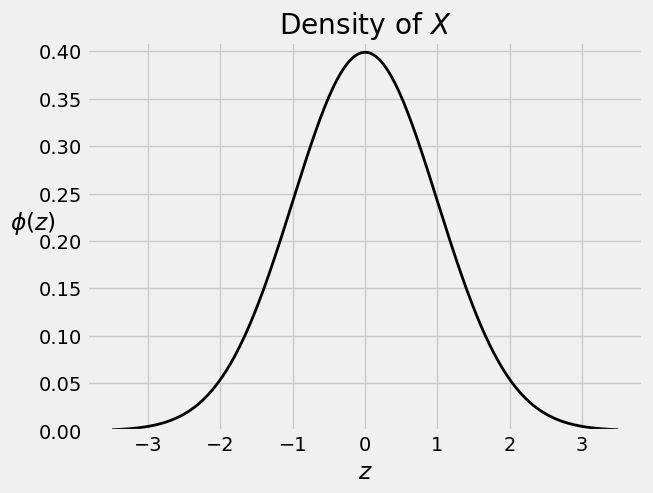

In [174]:
# NO CODE
z = np.arange(-3.5, 3.51, 0.01)
phi = stats.norm.pdf(z)
plt.plot(z, phi, color='k', lw=2)
plt.ylim(0, 0.41)
plt.title('Density of $X$')
plt.xlabel('$z$')
plt.ylabel('$\phi(z)$', rotation=0);

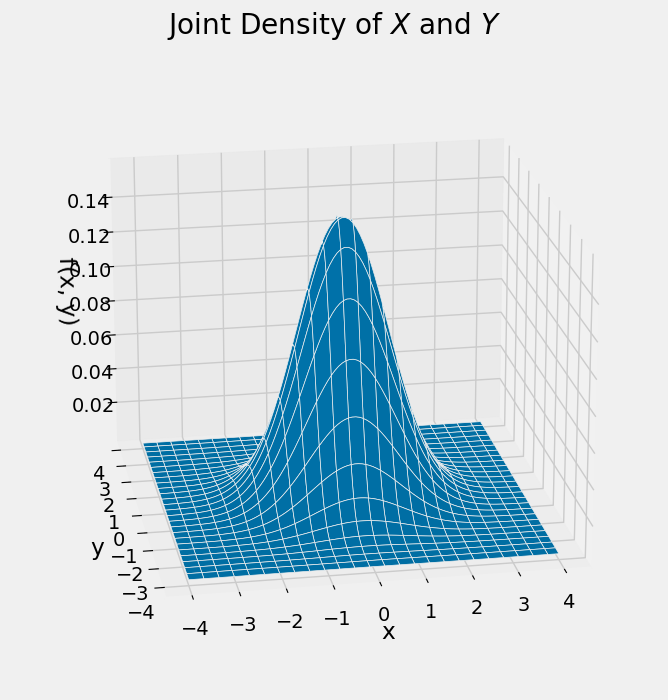

In [178]:
import math
def indep_standard_normals(x,y):
    return 1/(2*math.pi) * np.exp(-0.5*(x**2 + y**2))

Plot_3d((-4, 4), (-4, 4), indep_standard_normals, rstride=4, cstride=4)
plt.title('Joint Density of $X$ and $Y$');

### Chi-squared distribution

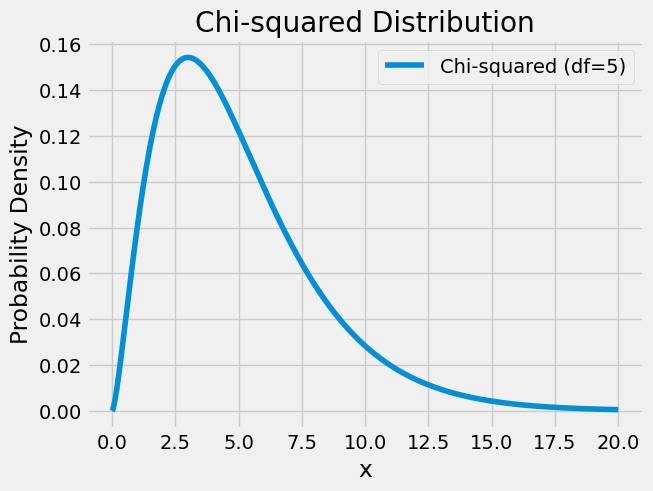

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Parameters
df = 5  # degrees of freedom
x = np.linspace(0, 20, 1000)

# Chi-squared distribution
y = chi2.pdf(x, df)

# Plotting
plt.plot(x, y, label=f'Chi-squared (df={df})')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Chi-squared Distribution')
plt.legend()
plt.grid(True)
plt.show()


### F- Distribution

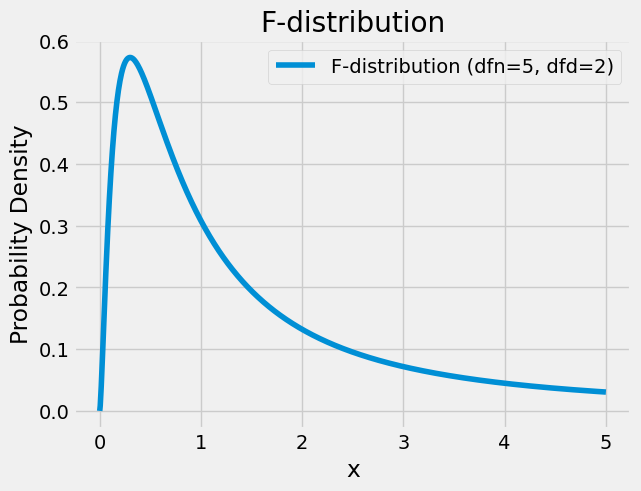

In [202]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Parameters
dfn = 5  # degrees of freedom numerator
dfd = 2  # degrees of freedom denominator
x = np.linspace(0, 5, 1000)

# F-distribution
y = f.pdf(x, dfn, dfd)

# Plotting
plt.plot(x, y, label=f'F-distribution (dfn={dfn}, dfd={dfd})')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('F-distribution')
plt.legend()
plt.grid(True)
plt.show()


#### T- Distribution

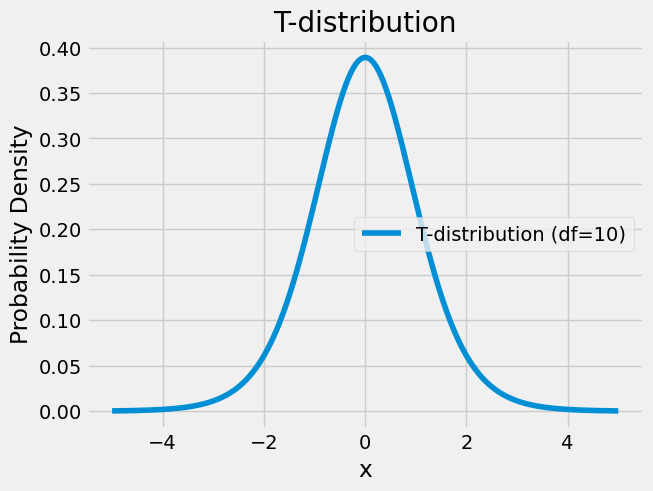

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parameters
df = 10  # degrees of freedom
x = np.linspace(-5, 5, 1000)

# T-distribution
y = t.pdf(x, df)

# Plotting
plt.plot(x, y, label=f'T-distribution (df={df})')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('T-distribution')
plt.legend()
plt.grid(True)
plt.show()


#### Uniform distribution

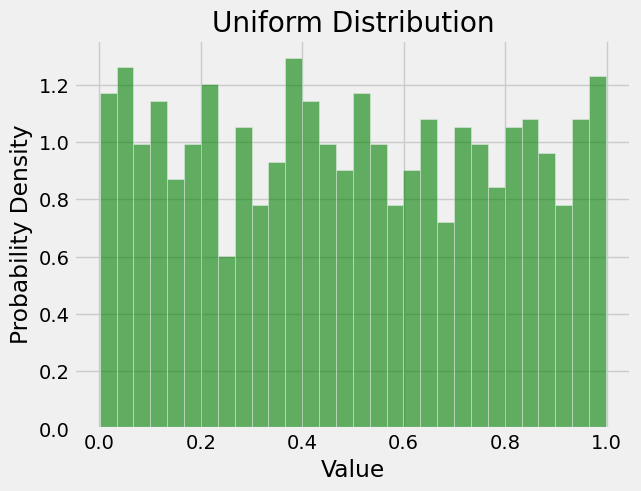

In [210]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
low = 0  # lower bound
high = 1  # upper bound
size = 1000  # number of samples

# Uniform distribution
samples = np.random.uniform(low, high, size)

# Plotting
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Uniform Distribution')
plt.grid(True)
plt.show()


#### beta distribution

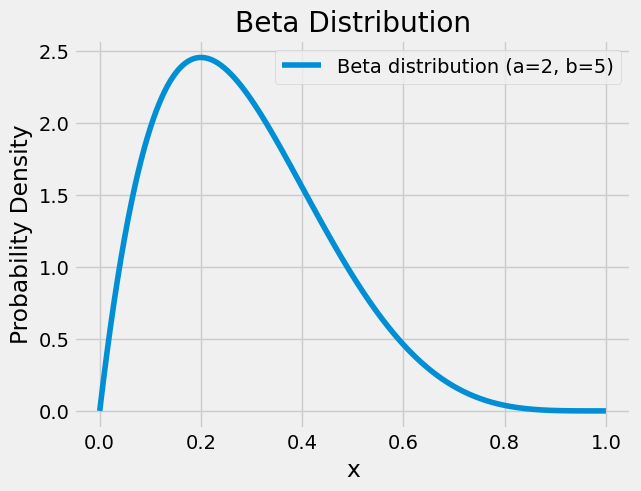

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters
a, b = 2, 5  # shape parameters
x = np.linspace(0, 1, 1000)

# Beta distribution
y = beta.pdf(x, a, b)

# Plotting
plt.plot(x, y, label=f'Beta distribution (a={a}, b={b})')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Beta Distribution')
plt.legend()
plt.grid(True)
plt.show()


### bayes theorem

The probability of rain given clouds is 0.42


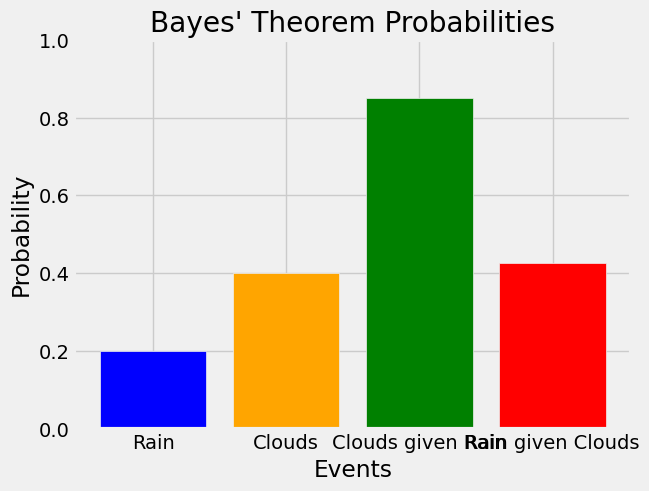

In [218]:
import matplotlib.pyplot as plt

def bayes_theorem(pA, pB, pBA):
    """
    Calculate the probability of event A given event B has occurred using Bayes' Theorem.
    
    Parameters:
    pA (float): The prior probability of event A.
    pB (float): The prior probability of event B.
    pBA (float): The conditional probability of event B given event A has occurred.
    
    Returns:
    float: The posterior probability of event A given event B has occurred.
    """
    return (pA * pBA) / pB

# Example probabilities
pA = 0.2  # Probability of rain
pB = 0.4  # Probability of clouds
pBA = 0.85  # Probability of clouds given rain

# Calculate the probability of rain given clouds
posterior_probability = bayes_theorem(pA, pB, pBA)
print(f"The probability of rain given clouds is {posterior_probability:.2f}")

# Plotting the results
events = ['Rain', 'Clouds', 'Clouds given Rain', 'Rain given Clouds']
probabilities = [pA, pB, pBA, posterior_probability]

plt.bar(events, probabilities, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Events')
plt.ylabel('Probability')
plt.title('Bayes\' Theorem Probabilities')
plt.ylim(0, 1)
plt.show()


In [ ]:
Refer: 
    https://www.cuemath.com/data/continuous-random-variable/
    https://www.cuemath.com/data/bayes-theorem/
    https://www.knime.com/blog/continuous-probability-distribution
    https://www.cuemath.com/data/central-limit-theorem/